           ISIN Classification 2018-03-31 00:00:00  2018-04-30 00:00:00  \
0  LU0011963757      Article 8           -0.913811             2.226806   
1  LU0085394210      Article 6           -3.445846             1.033092   
2  LU2056540110      Article 8                 NaN                  NaN   
3  LU2236271966      Article 8                 NaN                  NaN   
4  LU0066794479      Article 8            -1.96265             2.680218   

   2018-05-31 00:00:00  2018-06-30 00:00:00  2018-07-31 00:00:00  \
0             0.662231             0.957489             1.487446   
1             3.373957            -4.662621            -1.344931   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4            -1.457590            -0.618947             2.041936   

   2018-08-31 00:00:00  2018-09-30 00:00:00  2018-10-31 00:00:00  ...  \
0            -2.987647            -1.351649            -9.860927  .

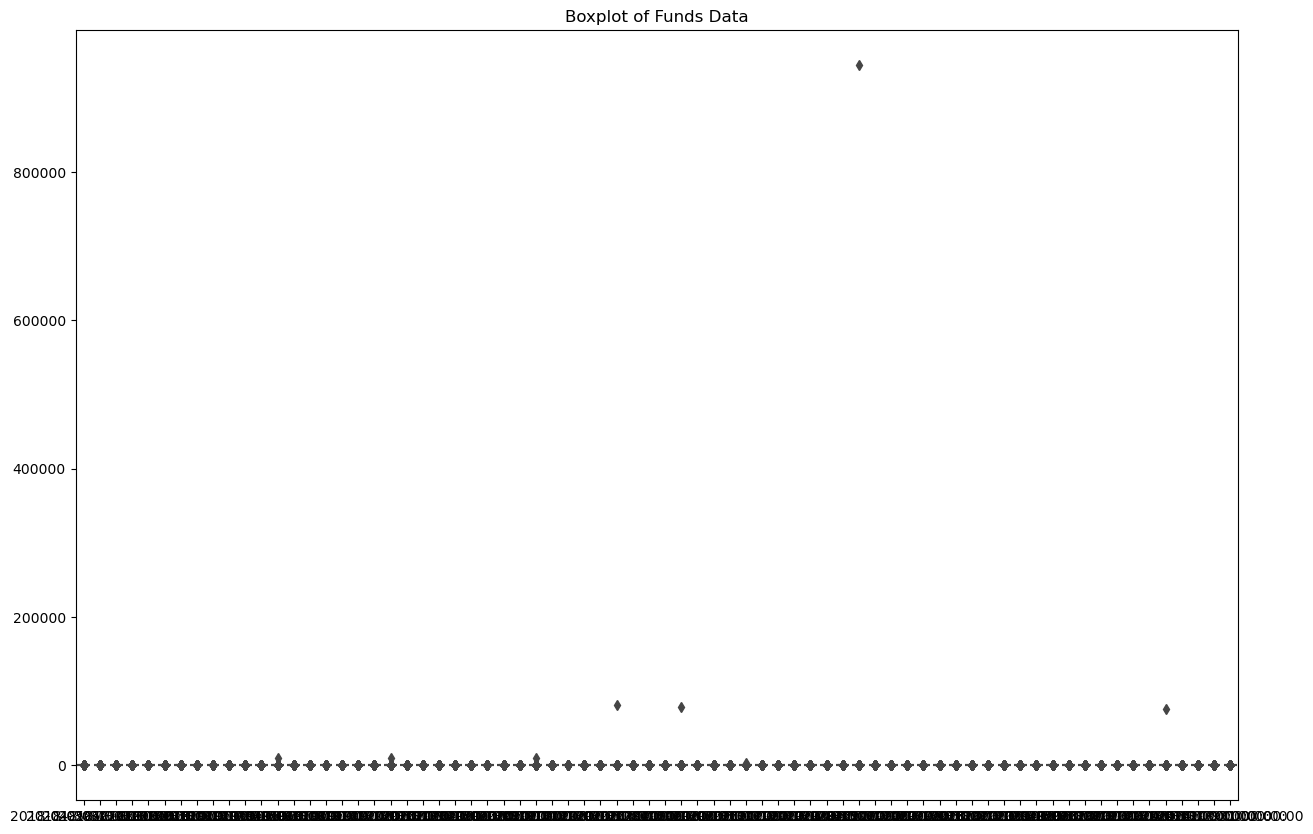

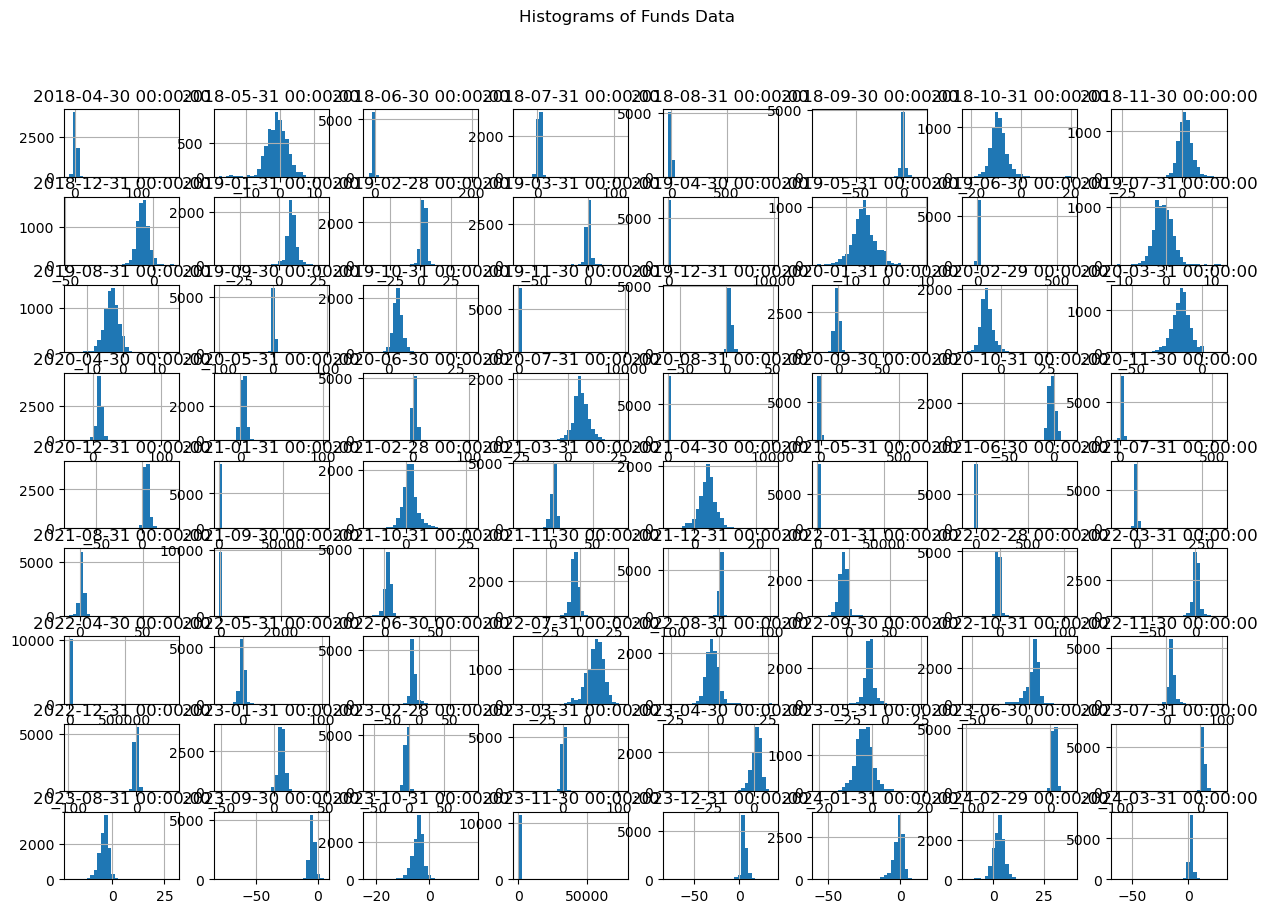

Number of outliers in each column:
2018-04-30    122
2018-05-31     88
2018-06-30    173
2018-07-31    196
2018-08-31    135
             ... 
2023-11-30    408
2023-12-31    846
2024-01-31    400
2024-02-29    298
2024-03-31    493
Length: 72, dtype: int64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
funds_data = pd.read_excel('Dataset - Funds - Clean.xlsx')

# Display the first few rows of the dataset
print(funds_data.head())

# Select only numeric columns
numeric_data = funds_data.select_dtypes(include=[np.number])

# Descriptive statistics
descriptive_stats = numeric_data.describe()
print(descriptive_stats)

# Detecting outliers using IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Outlier detection rule
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR)))
print(outliers)

# Visualizing outliers using box plots
plt.figure(figsize=(15, 10))
sns.boxplot(data=numeric_data)
plt.title('Boxplot of Funds Data')
plt.show()

# Visualizing distributions using histograms
numeric_data.hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Funds Data')
plt.show()

# Number of outliers in each column
outliers_count = outliers.sum()
print("Number of outliers in each column:")
print(outliers_count)


        2018-03-31   2018-04-30   2018-05-31   2018-06-30   2018-07-31  \
count  5921.000000  6044.000000  6117.000000  6164.000000  6228.000000   
mean     -1.731273     1.303383    -0.866536    -1.387942     2.220176   
std      29.692319     3.593058     3.129807     5.460485     4.108590   
min     -63.724860    -8.727288   -17.841446   -12.850142   -25.019508   
25%      -3.299534    -0.171418    -2.866280    -2.728017     0.880784   
50%      -2.192348     1.435506    -0.782537    -1.128870     2.273393   
75%      -1.076221     2.649549     1.186085    -0.035700     3.296989   
max    2276.449700   157.952800    12.841630   203.037450   111.017080   

        2018-08-31   2018-09-30   2018-10-31   2018-11-30   2018-12-31  ...  \
count  6311.000000  6373.000000  6430.000000  6578.000000  6671.000000  ...   
mean     -0.338807    -0.335473    -8.826221     1.471143    -6.041850  ...   
std      16.549966     2.909191     3.558452     2.908113     3.128162  ...   
min     -29.50211

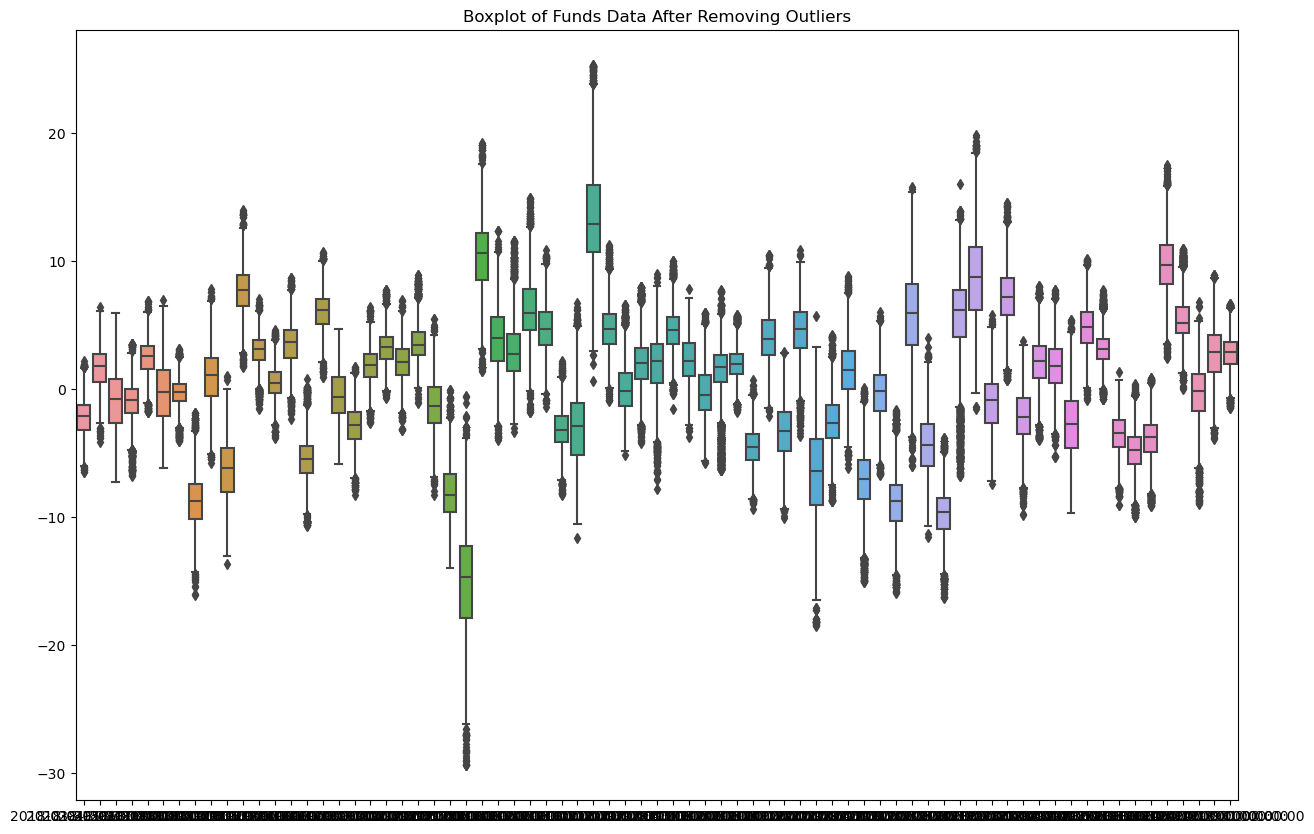

Descriptive statistics for classification: Article 6
        2018-03-31   2018-04-30   2018-05-31   2018-06-30   2018-07-31  \
count  1044.000000  1047.000000  1053.000000  1056.000000  1060.000000   
mean     -2.287285     1.955223    -0.916620    -1.117748     2.291612   
std       1.552569     1.707870     2.137796     1.472774     1.516657   
min      -6.465978    -3.439677    -6.524033    -6.227654    -1.809764   
25%      -3.389594     0.731415    -2.622747    -1.709956     1.133829   
50%      -2.344379     2.142036    -0.759190    -0.944331     2.520353   
75%      -1.189309     3.207469     0.508058    -0.149579     3.360179   
max       1.818454     6.454277     5.983770     1.800847     6.885028   

        2018-08-31   2018-09-30   2018-10-31   2018-11-30   2018-12-31  ...  \
count  1061.000000  1070.000000  1078.000000  1095.000000  1108.000000  ...   
mean     -0.387417    -0.216966    -8.178929     0.824524    -6.035694  ...   
std       2.219769     1.009227     2.12364

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
funds_data = pd.read_excel('Dataset - Funds - Clean.xlsx')

# Transform 'Article 0' to 'Article 6'
funds_data['Classification'] = funds_data['Classification'].replace('Article 0', 'Article 6')

# Separate the 'ISIN' and 'Classification' columns
metadata = funds_data[['ISIN', 'Classification']]
numeric_data = funds_data.drop(columns=['ISIN', 'Classification'])

# Ensure all remaining columns are numeric
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

# Descriptive statistics
descriptive_stats = numeric_data.describe()
print(descriptive_stats)

# Detecting outliers using IQR method with a stricter threshold
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Define stricter outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
no_outliers_data = numeric_data[~((numeric_data < lower_bound) | (numeric_data > upper_bound)).any(axis=1)]

# Re-integrate the 'ISIN' and 'Classification' columns
cleaned_data = metadata.loc[no_outliers_data.index].join(no_outliers_data)

# Visualizing the results after removing outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=no_outliers_data)
plt.title('Boxplot of Funds Data After Removing Outliers')
plt.show()

# Save the cleaned data if needed
cleaned_data.to_excel('Cleaned_Funds_Data.xlsx', index=False)

# Calculate descriptive statistics per classification
classification_groups = cleaned_data.groupby('Classification')

for classification, group in classification_groups:
    print(f"Descriptive statistics for classification: {classification}")
    print(group.describe())
    print("\n")
